## Decomposition Exercise

In [1]:
# import pandas
import pandas as pd

# import statsmodels.api as sm
import statsmodels.api as sm

# import matplotlib
import matplotlib.pyplot as plt


In [2]:
# load data
data = sm.datasets.co2.load_pandas()
co2 = data.data

* print the top 5 rows

In [7]:
co2

,co2
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4
...,...
2001-12-01,370.3
2001-12-08,370.8
2001-12-15,371.2
2001-12-22,371.3


* Resample the time series using monthly averages and store the new time series as a Series `y`.

* print the top 5 rows of 'y'

In [10]:
y = co2.resample('M').mean()
y

,co2
1958-03-31,316.100000
1958-04-30,317.200000
1958-05-31,317.433333
1958-06-30,NaN
1958-07-31,315.625000
...,...
2001-08-31,369.425000
2001-09-30,367.880000
2001-10-31,368.050000
2001-11-30,369.375000


* check for missing values

In [22]:
filter = y['co2'].isna()
print(y.isna().sum())
y[filter]

co2    5
dtype: int64


,co2
1958-06-30,NaN
1958-10-31,NaN
1964-02-29,NaN
1964-03-31,NaN
1964-04-30,NaN


* replace missing values with last available value


    - Example: If Feb 2010 is missing, use the value from Jan 2010.

In [24]:
y = y.fillna(method='backfill')
print(y.isna().sum())

co2    0
dtype: int64


* plot the time series `y`

<AxesSubplot: >

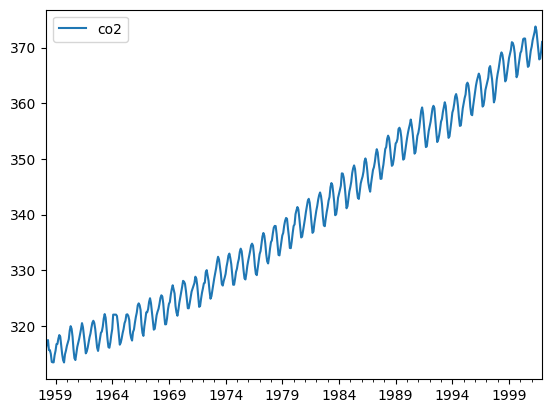

In [25]:
y.plot()

* Apply and plot the following:


    1. additive seasonal decomposition
    2. multiplicative seasonal decomposition

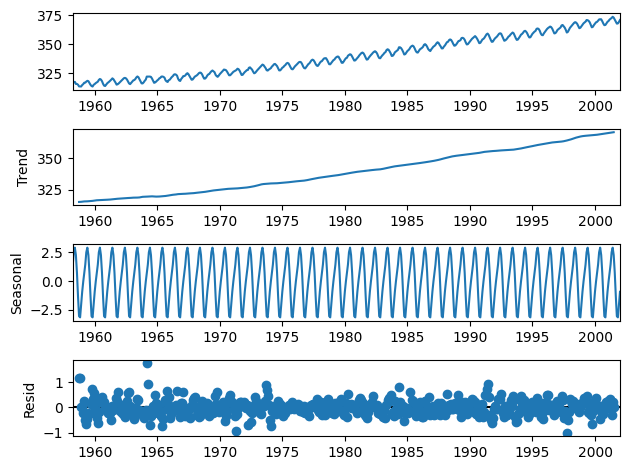

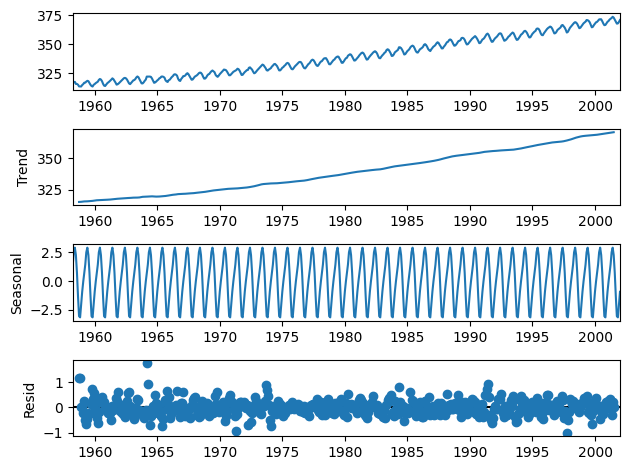

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose
seasonal = seasonal_decompose(y, model='additive')
seasonal.plot()

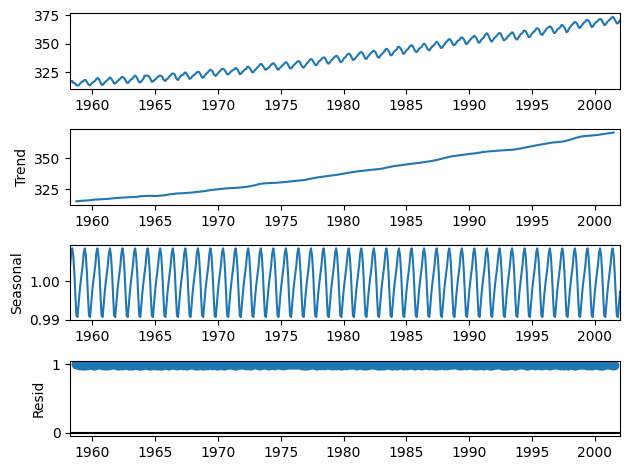

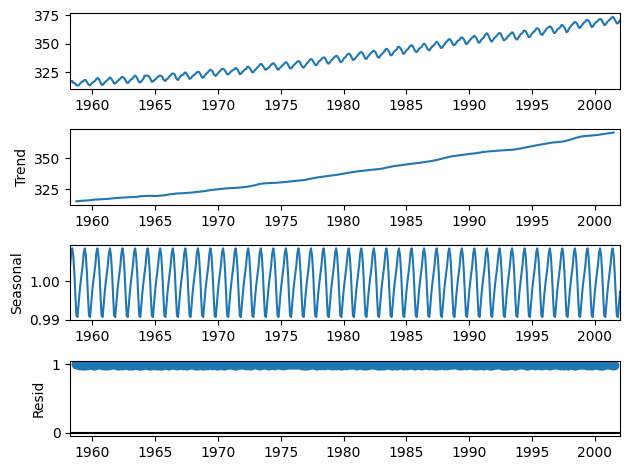

In [29]:
mult = seasonal_decompose(y, model='multiplicative')
mult.plot()